# Importing libraries

In [2]:
# import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# Importing Data

In [3]:
# turn a project folder path into a string

path = r'/Users/mart/Documents/06-2022 Instacart Basket Analysis'

In [4]:
# import 'cust_ords_prods_merge.pkl'

cust_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merge.pkl'))

In [5]:
cust_ords_prods_merge.head()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,...,first_time_order,add_to_cart_order,reordered,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,False,2,0,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,False,1,1,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,False,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,True,1,0,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,False,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [6]:
cust_ords_prods_merge.isnull().sum()

user_id                                0
first_name                             0
surname                                0
gender                                 0
state                                  0
age                                    0
date_joined                            0
n_dependants                           0
fam_status                             0
income                                 0
product_id                             0
product_name                           0
aisle_id                               0
department_id                          0
prices                              5127
order_id                               0
order_number                           0
orders_day_of_week                     0
order_hour_of_day                      0
days_since_prior_order           2076096
first_time_order                       0
add_to_cart_order                      0
reordered                              0
max_order                              0
loyalty_flag    

# Data Visualizations 

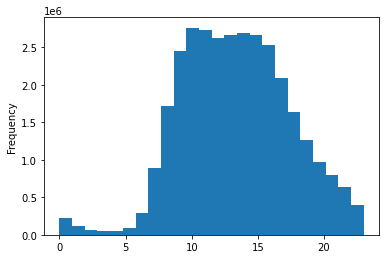

In [5]:
# create a histogram for the column 'order_hour_of_day' 

hist_ord_hod = cust_ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)

The majority of orders were placed between 9 am and 15 pm, during the lunch hour, as shown by the histogram. The busiest hour is specifically around 10 am. 
It seems that customers prefer to place orders during their free time or after they get home from work because that is when they can order the necessary groceries.

In [6]:
# export histogram

hist_ord_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ord_hod.png'))

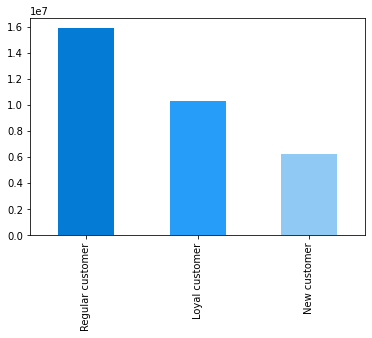

In [7]:
# create a bar chart for the columnt 'loyalty_flag' to check the distribution of orders among customers in terms of loyalty

bar_orders_loyal = cust_ords_prods_merge['loyalty_flag'].value_counts().plot.bar(color = ['#047CD6','#269EF9','#8FC9F4'])

In [8]:
# export a bar chart 'bar_orders_loyal'

bar_orders_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyal.png'))

* Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [9]:
# set the seed for the random number generator

np.random.seed(4)

In [10]:
# create a List holding True/False values to the test np.random.rand() <= 0.7

dev = np.random.rand(len(cust_ords_prods_merge)) <= 0.7

In [11]:
# store 70% of the sample in the dataframe big

big = cust_ords_prods_merge[dev]

In [12]:
# store 30% of the sample in the dataframe small

small = cust_ords_prods_merge[~dev]

In [13]:
# check if we get the same numbers of rows

len(cust_ords_prods_merge)

32404859

In [14]:
len(big)+len(small)

32404859

In [15]:
# reduce the samples to 'order_hour_of_day' and 'prices'

df_1 = small[['order_hour_of_day','prices']]

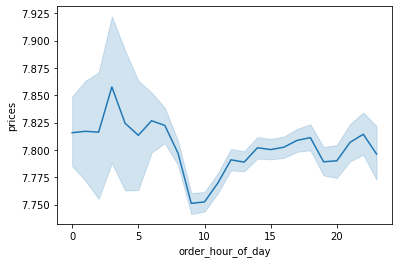

In [16]:
# create a line chart

line_1 = sns.lineplot(data = df_1, x = 'order_hour_of_day', y = 'prices')

Spending rises in the hours between 10 and 18 o'clock. It thereafter becomes quite stable and only starts to decline after 21.
The data displays an unusual peak around 3 am.

In [23]:
df_big = big[['order_hour_of_day','prices']]

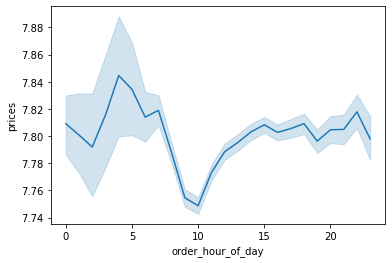

In [24]:
# create a line chart

line_big = sns.lineplot(data = df_big, x = 'order_hour_of_day', y = 'prices')

In [17]:
# export a line chart

line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ords_hod_prices.png'))

* Determine whether there’s a connection between age and family situation (by creating a line chart exploring the connections between age and number of dependents)

In [18]:
# reduce the samples to 'age' and 'n_dependants'

df_2 = small[['age','n_dependants']]

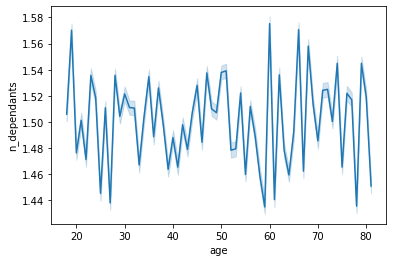

In [19]:

line_2 = sns.lineplot(data = df_2, x = 'age', y = 'n_dependants')

There is no visible relationship between age and family situations because the number of dependents doesn't rise with age. The height of the line varies across the entire chart.

In [20]:
# export a line chart

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_fam_situation.png'))

* Explore whether there’s a connection between age and spending power (income)

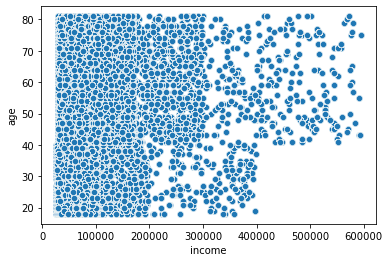

In [21]:
# create a scatterplot of the 'income' and 'age' columns

scatter_income_age = sns.scatterplot(x = 'income', y = 'age', data = cust_ords_prods_merge)

As shown in the scatterplott, most customers have equal purchasing power (up to $2,00000), but only those above the age of 40 have larger purchasing power (incomes greater than 400000 dollars).

# Export chart

In [22]:
# export scatterplot

scatter_income_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_income_age.png'))